In [286]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
from sklearn.linear_model import LinearRegression

In [303]:
df = pd.read_csv('barleyCropData.csv')
# df.index = pd.to_datetime(df['Year'], format='%Y').dt.year
# df['Year']
df.index = pd.to_datetime(df['Year'], format='%Y')
# df = df.drop(['Year'], 1)
# df.set_index('Year', inplace=True)
# df.index = pd.to_datetime(df1.index)
# df.head()
df.head()

,Year,Yield,Unit for yield,Price,Unit for price
Year,,,,,
1866-01-01,1866,24.0,bushels,0.952,$/bushel
1867-01-01,1867,22.5,bushels,1.220,$/bushel
1868-01-01,1868,21.8,bushels,1.490,$/bushel
1869-01-01,1869,23.5,bushels,0.872,$/bushel
1870-01-01,1870,21.8,bushels,0.853,$/bushel


In [304]:
df1 = df[['Year', 'Yield']]
df2 = df[['Year', 'Price']]
# df1 = df[['Yield']]
# df2 = df[['Price']]
df1

,Year,Yield
Year,,
1866-01-01,1866,24.0
1867-01-01,1867,22.5
1868-01-01,1868,21.8
1869-01-01,1869,23.5
1870-01-01,1870,21.8
...,...,...
2017-01-01,2017,73.0
2018-01-01,2018,77.5
2019-01-01,2019,77.7


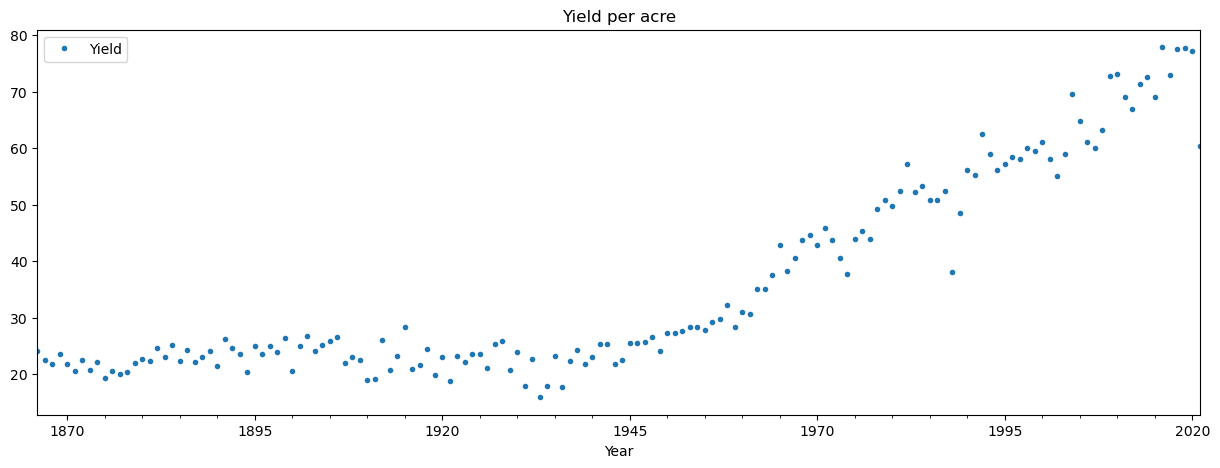

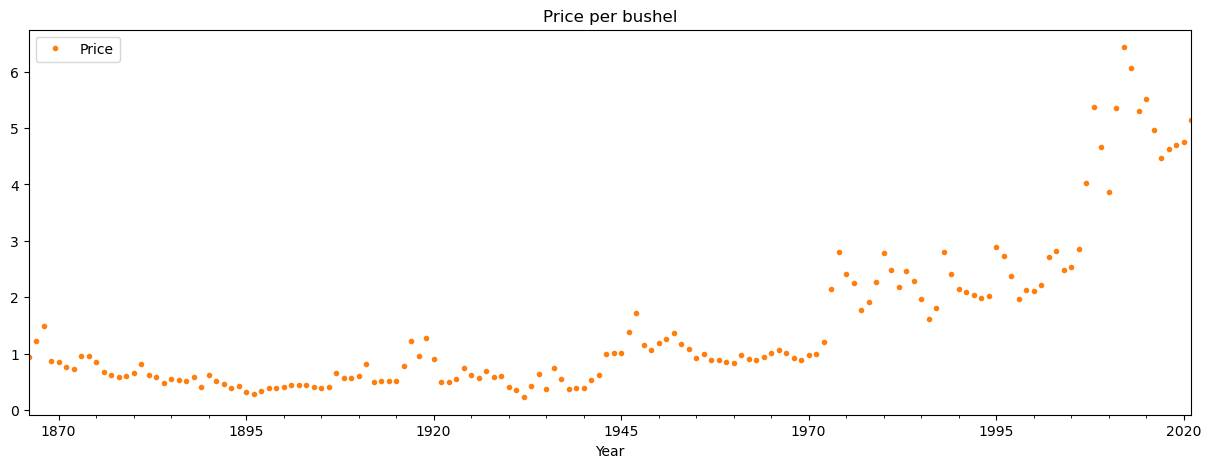

In [250]:
df1.plot(style='.', figsize=(15, 5), color=color_pal[0], title='Yield per acre')
df2.plot(style='.', figsize=(15, 5), color=color_pal[1], title='Price per bushel')
plt.show()

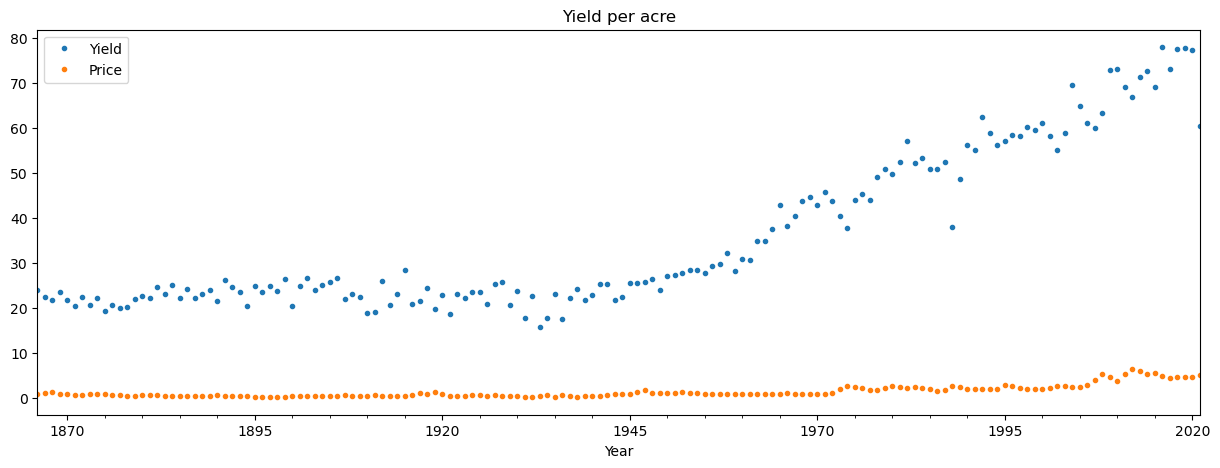

In [251]:
ax = df1.plot(style='.', figsize=(15, 5), color=color_pal[0], title='Yield per acre')
df2.plot(ax=ax, style='.', color=color_pal[1])
plt.show()

## Train/ Test Split

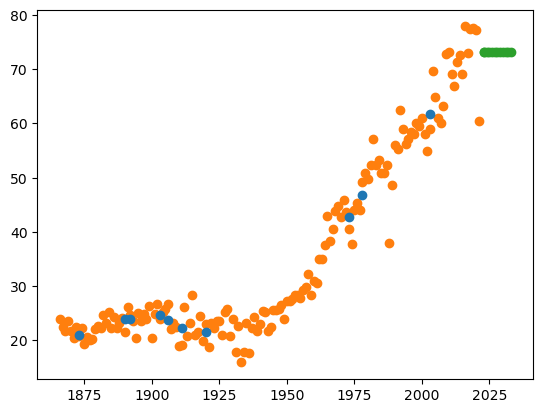

In [358]:
from sklearn import neighbors
X = df1.iloc[:, :-1]
y = df1.iloc[:, 1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=10,random_state=0) 
knn = neighbors.KNeighborsRegressor(5, weights="uniform")
y_ = knn.fit(X_train, y_train)
y__ = y_.predict(X_test)
plt.scatter(X, y, color=color_pal[1], label="Actual")
plt.scatter(X_test, y__, color=color_pal[0], label="Prediction")
plt.scatter(df_newnew, new__, color=color_pal[2], label="2023")
plt.show()
# df_test

In [357]:
year_table = pd.to_datetime(['2023','2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033'])
year_col = [2023, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033]
# year_table = pd.to_datetime(['2050'])
# year_col = [2050]
df_newnew = pd.DataFrame(year_col, columns=['Year'])
df_newnew.index = year_table
new__ = y_.predict(df_newnew)
print(new__)

[73.16 73.16 73.16 73.16 73.16 73.16 73.16 73.16 73.16 73.16 73.16 73.16]


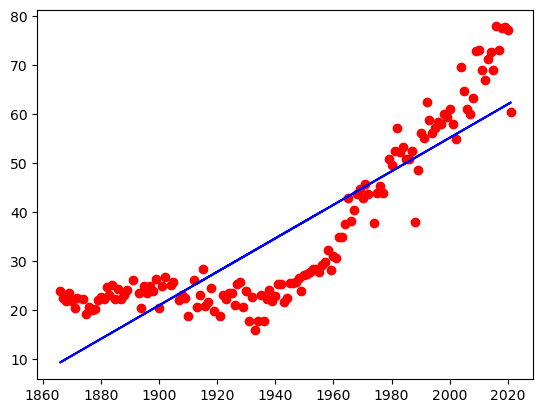

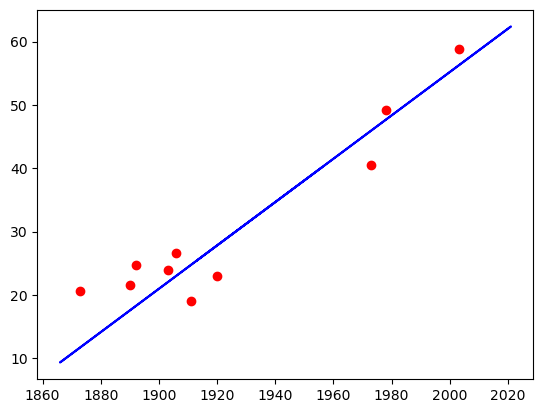

In [302]:
X = df1.iloc[:, :-1]
y = df1.iloc[:, 1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=10,random_state=0)  
regressor=LinearRegression()  
regressor.fit(X_train,Y_train)  
y_pre=regressor.predict(X_test)
# plt.plot(X_test, regressor.predict(X_test), color=color_pal[0])  
# plt.show()
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.show()

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.show()

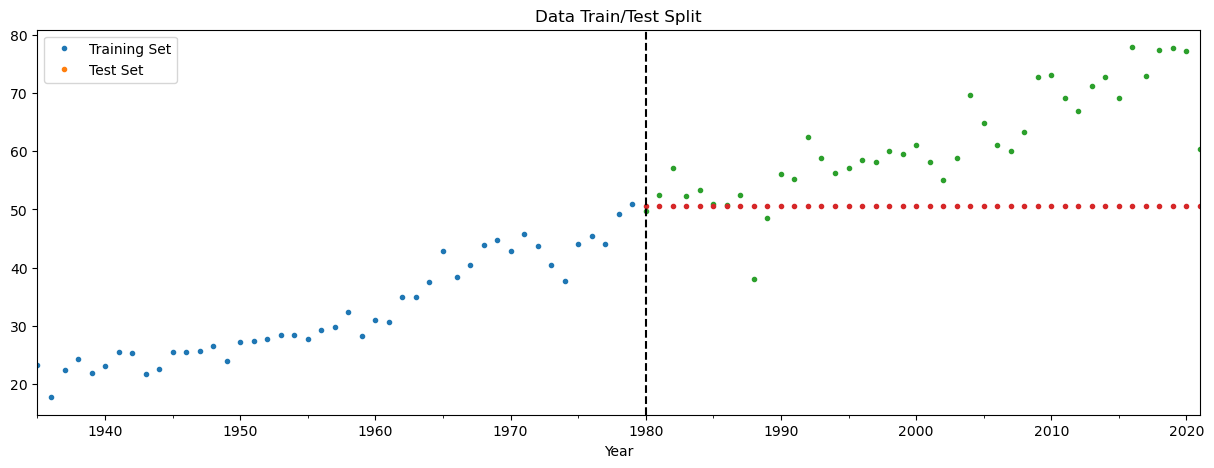

In [278]:
df1 = df1.loc[df1.index >= '1935']
train = df1.loc[df1.index < '1980']
test = df1.loc[df1.index >= '1980']



fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', style='.', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set', style='.')
ax.axvline('1980', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

# X_train, X_test, y_train, y_test = train_test_split(df1['Year'], df1['Yield'])
# y_train


In [279]:
def create_features(df):
    df = df.copy()
    df['Year'] = df.index.year
    return df

In [280]:
train = create_features(train)
test = create_features(test)

In [264]:
test.columns

Index(['Yield', 'Year'], dtype='object')

In [281]:
FEATURES = ['Year']
TARGET = ['Yield']

In [282]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]


In [283]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=10, learning_rate=0.01)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)


[0]	validation_0-rmse:8.74091	validation_1-rmse:30.16907
[1]	validation_0-rmse:8.66576	validation_1-rmse:30.07106
[2]	validation_0-rmse:8.59138	validation_1-rmse:29.97400
[3]	validation_0-rmse:8.51774	validation_1-rmse:29.87788
[4]	validation_0-rmse:8.44485	validation_1-rmse:29.78270
[5]	validation_0-rmse:8.37269	validation_1-rmse:29.68844
[6]	validation_0-rmse:8.30126	validation_1-rmse:29.59509
[7]	validation_0-rmse:8.23056	validation_1-rmse:29.50265
[8]	validation_0-rmse:8.16057	validation_1-rmse:29.41110
[9]	validation_0-rmse:8.09123	validation_1-rmse:29.32045
[10]	validation_0-rmse:8.02265	validation_1-rmse:29.23067
[11]	validation_0-rmse:7.95478	validation_1-rmse:29.14177
[12]	validation_0-rmse:7.88753	validation_1-rmse:29.05373
[13]	validation_0-rmse:7.82103	validation_1-rmse:28.96654
[14]	validation_0-rmse:7.75521	validation_1-rmse:28.88020
[15]	validation_0-rmse:7.69007	validation_1-rmse:28.79469
[16]	validation_0-rmse:7.62552	validation_1-rmse:28.71002
[17]	validation_0-rmse:7

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [284]:
predDF = pd.DataFrame(reg.predict(X_test), columns=['Prediction'])
predDF.index = X_test.index

df1 = df1.merge(predDF, how='left', left_index=True, right_index=True)


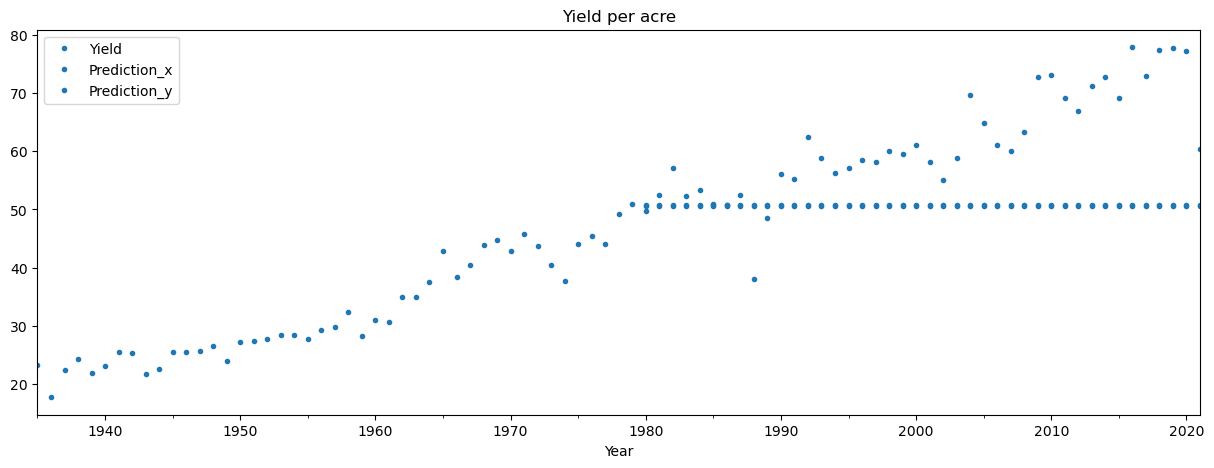

In [285]:
df1.plot(style='.', figsize=(15, 5), color=color_pal[0], title='Yield per acre')
plt.show()